## Bank Marketing Data Analysis

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 21 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 21 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

#### Importing Libraries

In [1]:
#import libraries
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

In [32]:
# loading csv data to pandas dataframe
bank_data = pd.read_csv( "../data/bank-additional-full.csv", sep=";")
print(bank_data.shape)
bank_data.head(5)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Checking Columns

In [4]:
#list all columns
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Explanatory Data Analysis

### Conducting EDA on data

In [6]:
def examine_data_frame( df):
    for name in df.columns:
        print("----------")
        print(df[ name].dtype)
        if df[name].dtype is np.dtype( 'O'):
            print(df[name].value_counts())
            print("Name: ", name)
        else:
            print(df[ name].describe())

examine_data_frame(bank_data)

----------
int64
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
----------
object
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Name:  job
----------
object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Name:  marital
----------
object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Name:  education
----------
object
no         3

#### Checking for missing values

In [7]:
# Check missing values
bank_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing values in columns

In [24]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week',
                      'poutcome']
numerical_columns = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                     'cons.conf.idx','euribor3m','nr.employed']

In [9]:
bank_data[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Plot Univariate analysis

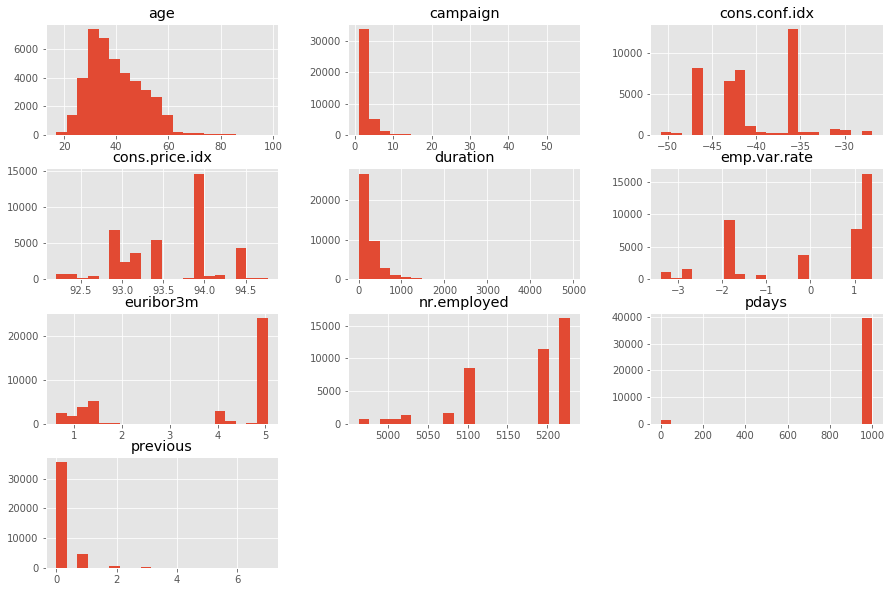

In [10]:
#plot histogram for all numerical variables
bank_data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()

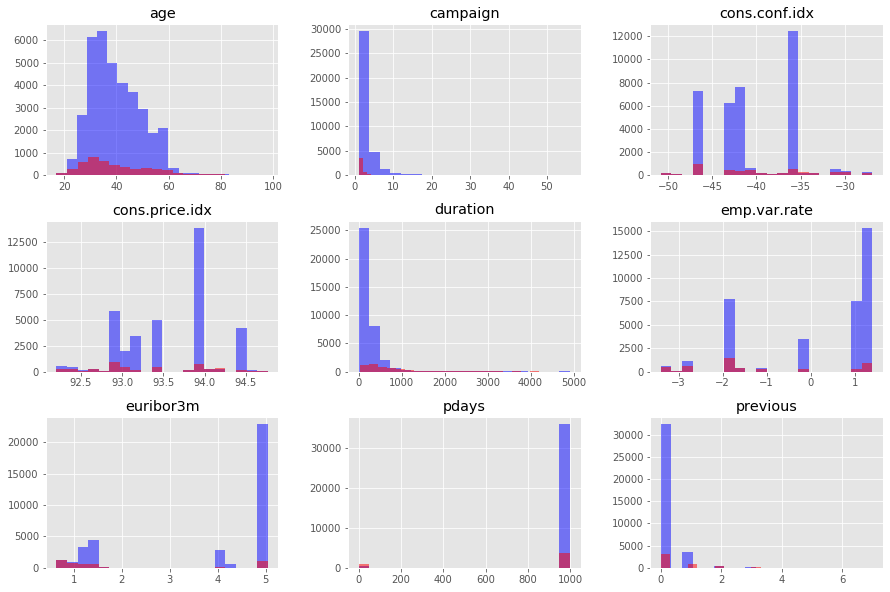

In [11]:
#plot numerical variable in relation to term deposit subscription
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
bank_data[bank_data.y == "no"][numerical_columns[:-1]].hist(bins=20, color="blue", alpha=0.5, ax=ax)
bank_data[bank_data.y == "yes"][numerical_columns[:-1]].hist(bins=20, color="red", alpha=0.5, ax=ax)
plt.show()

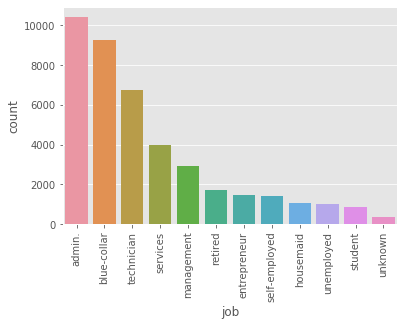

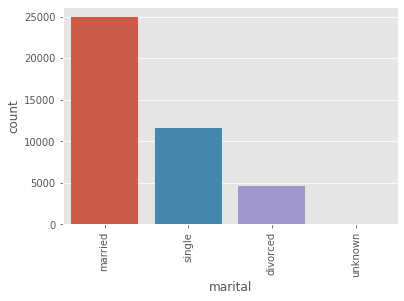

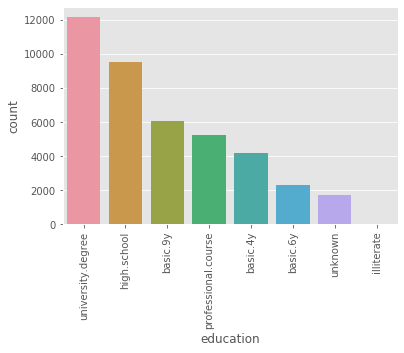

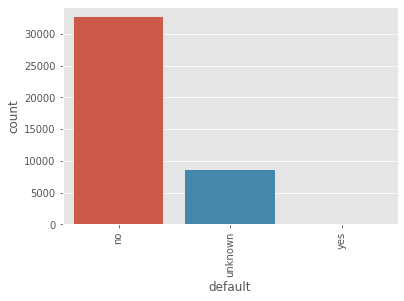

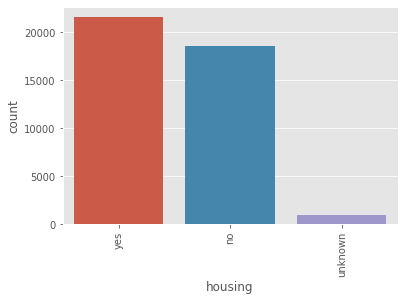

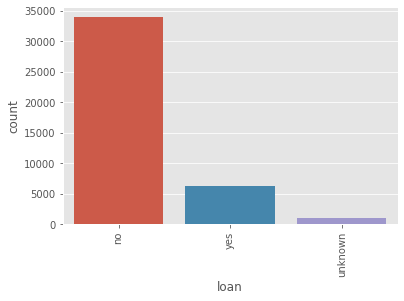

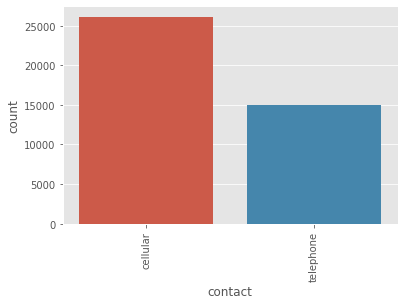

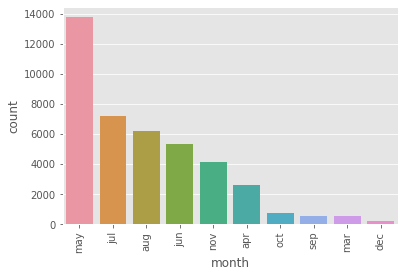

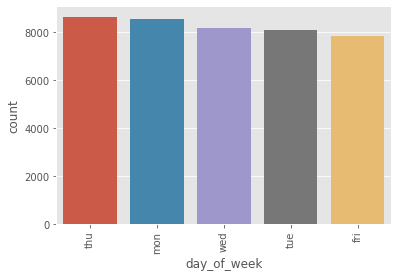

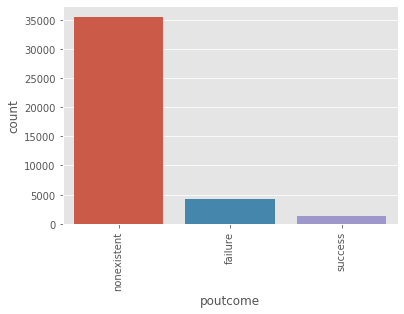

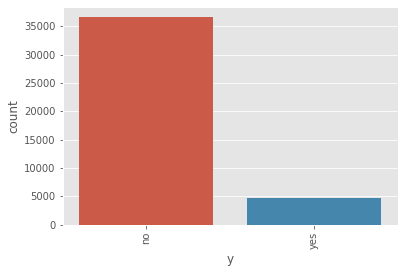

In [12]:
#Count plot of all catagorical data
def plot_catagorical(df):
    for feature in df.dtypes[df.dtypes == 'object'].index:
        sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()
plot_catagorical(bank_data)

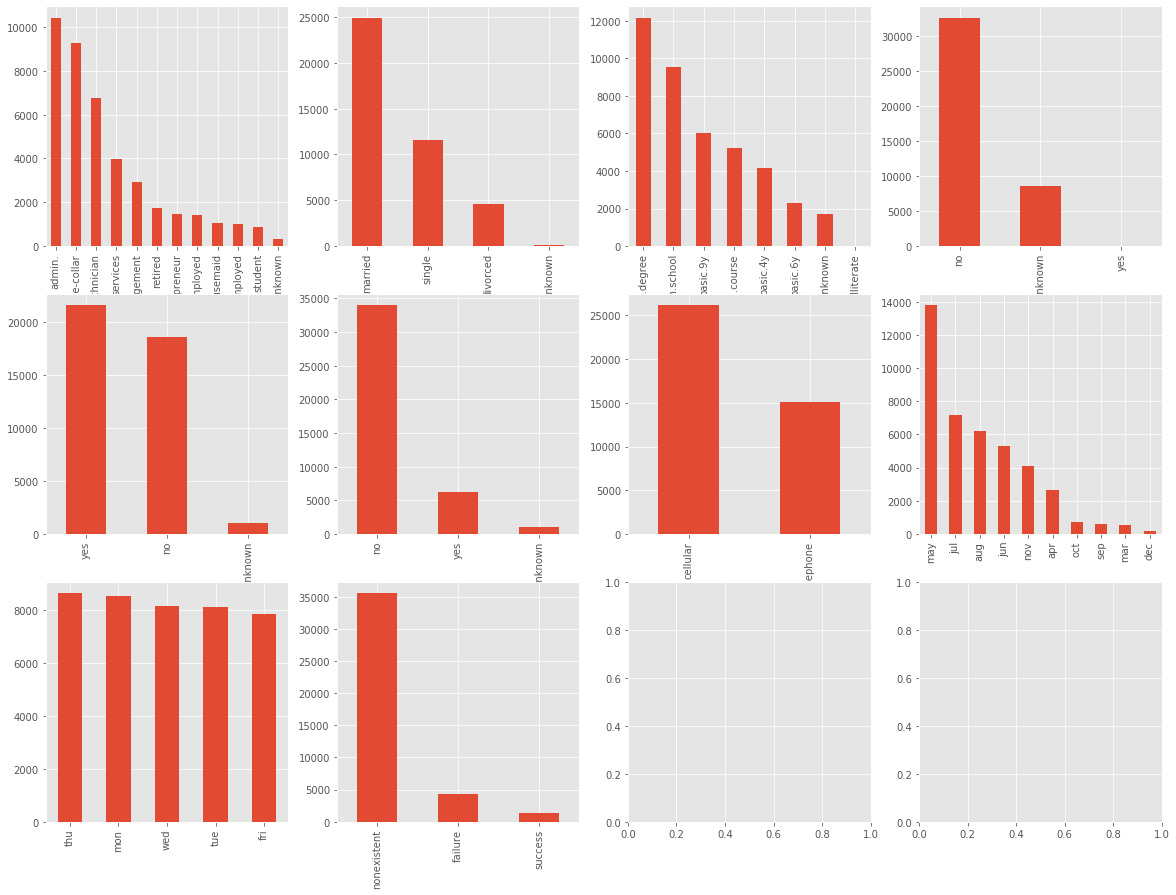

In [13]:
ROWS, COLS = 3, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 15))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_columns):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    bank_data[categorical_feature].value_counts().plot('bar', ax=ax[row, col])

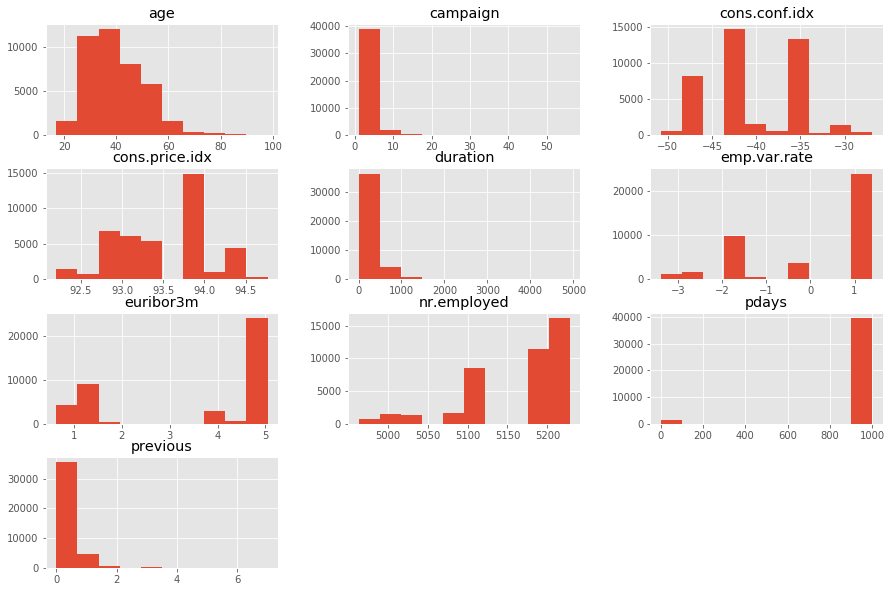

In [14]:
#plot histogram of all numerical data
def plot_numerical(df):
    df.hist(figsize=(15,10))
    plt.show()
plot_numerical(bank_data)

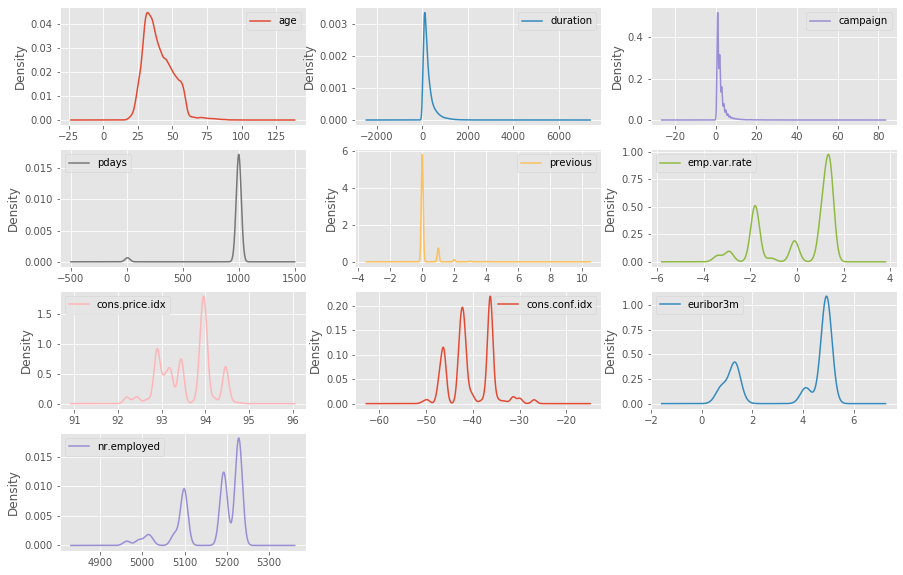

In [21]:
#plot histogram of all numerical data
def plot_density_numerical(df):
    df.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(15,10))
    plt.show()
plot_density_numerical(bank_data)


### Handling Outliers 

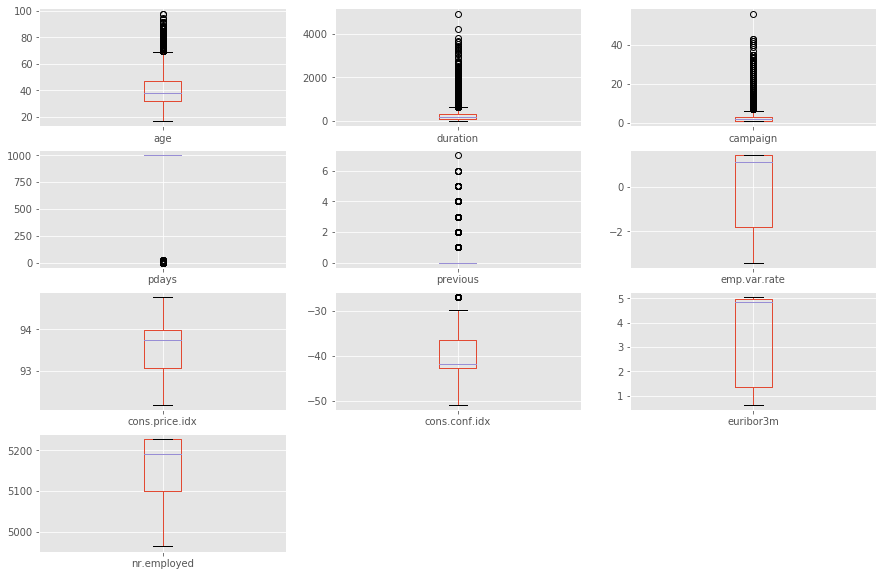

In [22]:
#plot box of all numerical data
def plot_box_numerical(df):
    df.plot(kind='box', subplots=True, layout=(4,3), sharex=False,figsize=(15,10))
    plt.show()
plot_box_numerical(bank_data)

### Function to find outliers

In [23]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

### Outliers Found in each numerical columns

In [25]:
def outliers(columns):
    for column in columns:
        x, y = find_outliers_tukey(bank_data[column])
        print("Outliers for",column)
        print(np.sort(y))
outliers(numerical_columns)

Outliers for age
[70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72
 72 72 72 72 72 72 72 72 72 72 72 72 72 72 73 73 73 73 73 73 73 73 73 73
 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73
 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74
 74 74 74 74 74 74 74 74 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75
 75 75 75 75 75 75 75 75 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76
 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76 76 77 77 77 77 77 77
 77 77 77 77 77 77 77 77 77 77 77 77 77 77 78 78 78 78 78 78 78 78 78 78
 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 79 79 79 79 79 79 79
 79 79 79 79 79 79 79 80 80 80 80 

**As we can see from above `age`,`duration`,`campaign`, and `cons.price.idx` have many outliers**

### Deleting rows 

In [33]:
#Dropping cons.price.index outliers
cons_index, cons_value = find_outliers_tukey(bank_data["cons.price.idx"])
bank_data = bank_data.drop(cons_index)

### Replacing with the max, min or median

In [34]:
#replacing duration outliers with maximum value
max_ = bank_data['duration'].max()
bank_data['duration'] = np.where(bank_data.duration > 645,max_,bank_data['duration'])

#replacing campaign outliers with maximum value
max_ = bank_data['campaign'].max()
bank_data['campaign'] = np.where(bank_data.campaign > 7, max_,bank_data['campaign'])

### Target variable Distribution

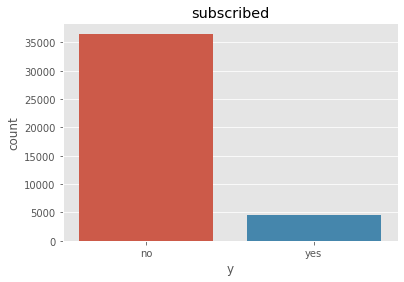

In [35]:
target = 'y'
sns.countplot(x=target,data=bank_data)
plt.title('subscribed')
plt.show()

## Preproccesing Data

### Handling invalid data

In [36]:
#dropping unknown values in job aatribute
bank_data = bank_data[bank_data.job != 'unknown']

#dropping unknown values in education attribute
bank_data = bank_data[bank_data.education != 'unknown']

#dropping unknown values in load attribute
bank_data = bank_data[bank_data.loan != 'unknown']

#dropping unknown values in housing attribute
bank_data = bank_data[bank_data.housing != 'unknown']

#dropping unknown values in default attribute
bank_data = bank_data[bank_data.default != 'unknown']

#dropping unknown values in marital attribute
bank_data = bank_data[bank_data.marital != 'unknown']

In [37]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
age               30488 non-null int64
job               30488 non-null object
marital           30488 non-null object
education         30488 non-null object
default           30488 non-null object
housing           30488 non-null object
loan              30488 non-null object
contact           30488 non-null object
month             30488 non-null object
day_of_week       30488 non-null object
duration          30488 non-null int64
campaign          30488 non-null int64
pdays             30488 non-null int64
previous          30488 non-null int64
poutcome          30488 non-null object
emp.var.rate      30488 non-null float64
cons.price.idx    30488 non-null float64
cons.conf.idx     30488 non-null float64
euribor3m         30488 non-null float64
nr.employed       30488 non-null float64
y                 30488 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [38]:
#percentage distribution of deposit
bank_data['y'].value_counts()/bank_data['y'].count()

no     0.873426
yes    0.126574
Name: y, dtype: float64

In [39]:
bank_data['y'].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

### Handling Categorical Variables

### Handling nominal variables

In [40]:
bank_data['education'].value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

In [42]:
#education encoding with integer encoding 
level_mapping = {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y':3, 'high.school':4,'professional.course':5,
                 'university.degree': 6}
bank_data['education'] = bank_data['education'].replace(level_mapping)

### Handling Binary Features

In [44]:
# encoding the binary feature
encoder = LabelEncoder()
bank_data['y'] = encoder.fit_transform(bank_data['y'])
bank_data['default'] = encoder.fit_transform(bank_data['default'])
bank_data['housing'] = encoder.fit_transform(bank_data['housing'])
bank_data['loan'] = encoder.fit_transform(bank_data['loan'])
bank_data['contact'] = encoder.fit_transform(bank_data['contact'])

### Handling Ordinal Variables

In [46]:
# transform data
bank_data = pd.get_dummies(bank_data, columns=['job','marital','month','day_of_week','poutcome'],
                                     drop_first=True)

In [47]:
bank_data.head()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,261,1,999,0,...,1,0,0,0,1,0,0,0,1,0
2,37,4,0,1,0,1,226,1,999,0,...,1,0,0,0,1,0,0,0,1,0
3,40,2,0,0,0,1,151,1,999,0,...,1,0,0,0,1,0,0,0,1,0
4,56,4,0,0,1,1,307,1,999,0,...,1,0,0,0,1,0,0,0,1,0
6,59,5,0,0,0,1,139,1,999,0,...,1,0,0,0,1,0,0,0,1,0


In [48]:
bank_data.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Correlation Matrix

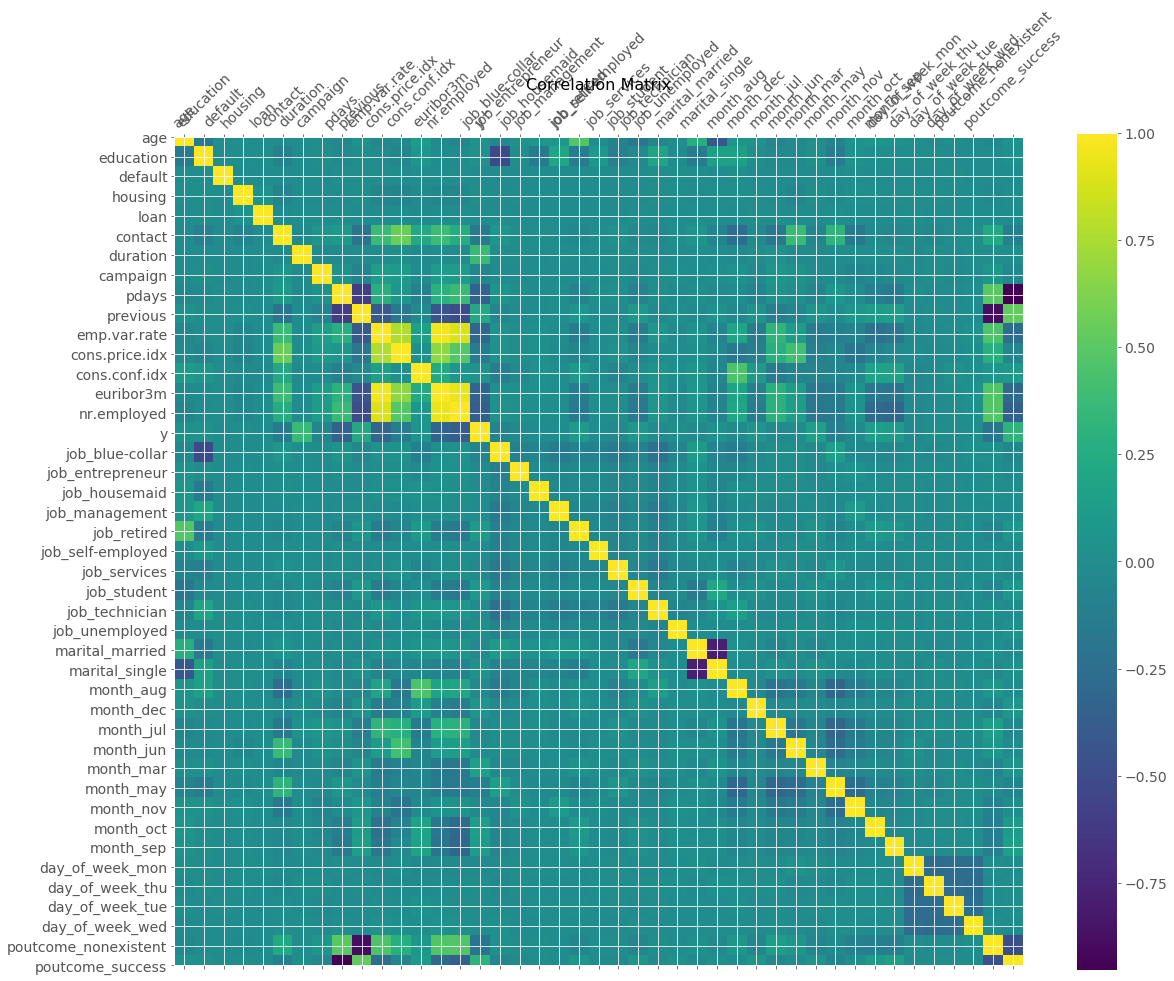

In [55]:
cor = bank_data.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(cor, fignum=f.number)
plt.xticks(range(bank_data.shape[1]), bank_data.columns, fontsize=14, rotation=45)
plt.yticks(range(bank_data.shape[1]), bank_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Balancing Data by upsampling small data

In [158]:
# Separate majority and minority classes
deposit_no = bank_data[bank_data.y==0]
deposit_yes= bank_data[bank_data.y==1]

In [159]:
print(deposit_no.shape,deposit_yes.shape)

(26629, 43) (3859, 43)


In [160]:
#up sample deposit yes
from sklearn.utils import resample
deposit_yes_upsampled = resample(deposit_yes, replace=True, n_samples=len(deposit_no), random_state=0)

In [161]:
upsampled_bank_data = pd.concat([deposit_no, deposit_yes_upsampled])

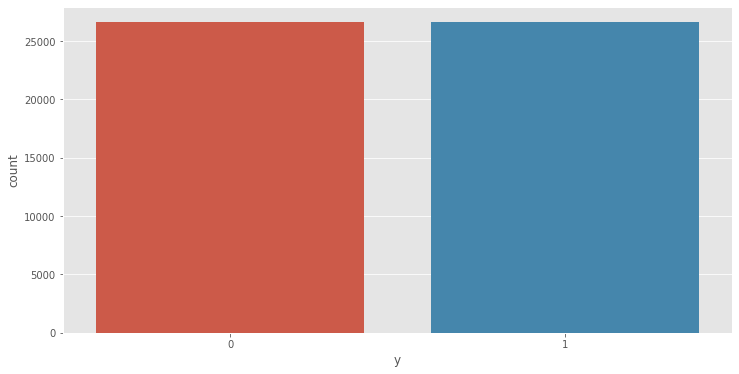

In [163]:
sns_plot =sns.countplot(x='y',data=upsampled_bank_data)
plt.show()

### Split Data into Training and Test Sets

In [219]:
#spliting data to train and test with ratio of 9 to 1
from sklearn.model_selection import train_test_split
features = ['age', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success']

X = bank_data[features]
y = bank_data[['y']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=0)

In [220]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
columns_to_scale= ['age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed',
                   'pdays','previous']
X[columns_to_scale]  = scaler.fit_transform(X[columns_to_scale])

C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\owner pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Normalization and Reduction

### Rescale all numerical columns

In [221]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
columns_to_scale= ['age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed',
                   'pdays','previous']
X_train[columns_to_scale]  = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale]  = scaler.fit_transform(X_test[columns_to_scale])


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\owner pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\prep

### Import and Apply PCA

In [166]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()


In [167]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [168]:
pca.explained_variance_ratio_

array([3.96773396e-01, 8.10189454e-02, 6.29216170e-02, 5.22492523e-02,
       3.91571022e-02, 3.32128647e-02, 3.25766890e-02, 3.15207678e-02,
       2.86028729e-02, 2.77185689e-02, 2.26827512e-02, 2.09226094e-02,
       1.95235899e-02, 1.93181087e-02, 1.78598501e-02, 1.26560467e-02,
       1.06081109e-02, 9.95612953e-03, 9.21552187e-03, 8.32545979e-03,
       7.00947028e-03, 6.14048243e-03, 5.90522303e-03, 5.80684444e-03,
       5.66128472e-03, 4.60764722e-03, 3.87789706e-03, 3.83123284e-03,
       3.65555722e-03, 3.14350093e-03, 3.05344871e-03, 2.57378439e-03,
       2.14787795e-03, 2.03719752e-03, 1.47227606e-03, 1.08468303e-03,
       5.83890003e-04, 3.16884263e-04, 1.36741178e-04, 8.67919950e-05,
       2.96380503e-05, 1.73917395e-05])

In [169]:
pca.n_components_

42

Text(0, 0.5, 'Cumulativie Explained Varaince')

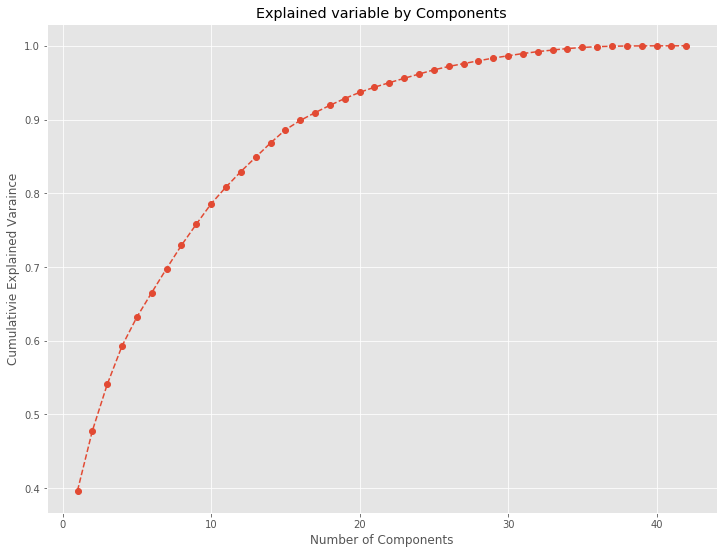

In [170]:
plt.figure(figsize=(12,9))
plt.plot(range(1,43),pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title("Explained variable by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulativie Explained Varaince")

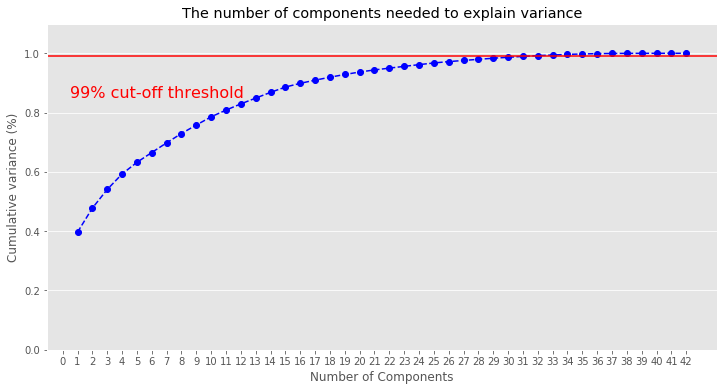

In [171]:
pca = PCA().fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 43, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 43, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

**Based on Above plots I used components with cummulative variance of `0.99%`. In another word  to get 99% of variance explained I need 32 principal components.**

In [172]:
pca = PCA(0.99)  # project from 42 to 32 dimensions
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(projected.shape)

(27439, 42)
(27439, 32)


### Apply the mapping (transform) to both the training set and the test set.

In [173]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)


## Models 

## Logistic Regression Model

In [191]:
print(X.shape,y.shape)

(30488, 42) (30488, 1)


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    ##PCA
    pca = PCA(0.99)
    pca.fit(xtr)
    xtr = pca.fit_transform(xtr)
    xvl = pca.fit_transform(xvl)
    X_test = pca.fit_transform(X_test)
    
    #model
    lr = LogisticRegression(C=2,solver='lbfgs')
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1

1 of KFold 5


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.7283973527071226
2 of KFold 5


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.7237982504441015
3 of KFold 5


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.7057763848867322
4 of KFold 5


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.7298899328545663
5 of KFold 5
ROC AUC score: 0.7071193438190753


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[5003  322]
 [ 405  366]]
Cv [0.7283973527071226, 0.7237982504441015, 0.7057763848867322, 0.7298899328545663, 0.7071193438190753] 
Mean cv Score 0.7189962529423195


Text(0.5, 0, 'False positive rate')

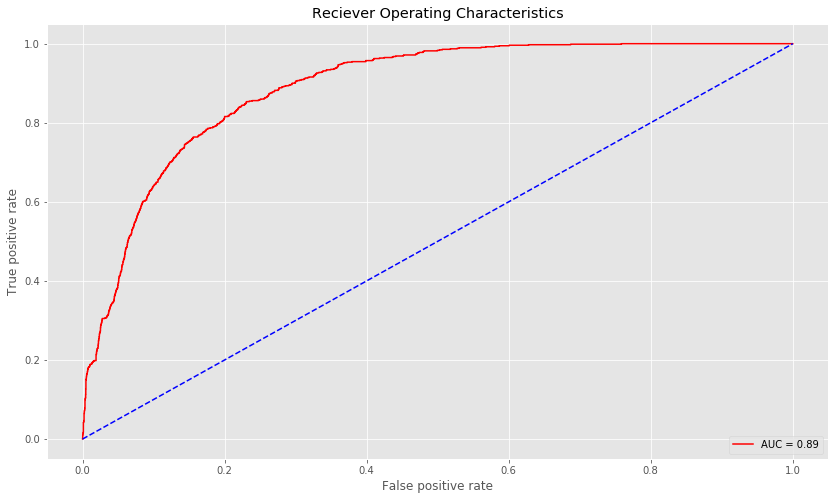

In [206]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


### K Fold

In [215]:
print(X.shape)

(30488, 42)


In [228]:
from sklearn.model_selection import KFold 
kf =KFold(n_splits=5, random_state=None) 

for train_index, test_index in kf.split(X,y):
    print("Train:", train_index, "Validation:",test_index)
    xtr, xvl = X.iloc[train_index], X.iloc[test_index] 
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    ##PCA
#     pca1 = PCA(0.99)
#     pca1.fit(xtr)
#     xtr = pca1.fit_transform(xtr)
#     xvl = pca1.fit_transform(xvl)
#     X_test = pca1.fit_transform(X_test)
#     print(X_test.shape)
    
    #model
    lr = LogisticRegression(C=2,solver='lbfgs')
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)

Train: [ 6098  6099  6100 ... 30485 30486 30487] Validation: [   0    1    2 ... 6095 6096 6097]


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.5468203769444424
Train: [    0     1     2 ... 30485 30486 30487] Validation: [ 6098  6099  6100 ... 12193 12194 12195]


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.5572883895988011
Train: [    0     1     2 ... 30485 30486 30487] Validation: [12196 12197 12198 ... 18291 18292 18293]


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.5482652108543299
Train: [    0     1     2 ... 30485 30486 30487] Validation: [18294 18295 18296 ... 24388 24389 24390]


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score: 0.6540824040824041
Train: [    0     1     2 ... 24388 24389 24390] Validation: [24391 24392 24393 ... 30485 30486 30487]
ROC AUC score: 0.5844876118938679


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [229]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[3488  473]
 [1520  616]]
Cv [0.7283973527071226, 0.7237982504441015, 0.7057763848867322, 0.7298899328545663, 0.7071193438190753, 0.5468203769444424, 0.5572883895988011, 0.5482652108543299, 0.6540824040824041, 0.5844876118938679] 
Mean cv Score 0.6485925258085443


## XGBoost 

## Multilayer perceptron